In [1]:
import os
import cv2
import numpy as np
import tensorflow
from tensorflow import keras
# from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.utils import load_img, img_to_array 
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load model
model = load_model("Trained_Models\Emotional_Analysis_model.h5")

In [3]:
face_haar_cascade = cv2.CascadeClassifier("OpenCV Documents\haarcascades\haarcascade_frontalface_default.xml")

In [4]:
cap = cv2.VideoCapture(0)


In [5]:
while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial Emotion Analysis ', resized_img)
    cv2.imwrite('output-1.jpg', test_img)

    if cv2.waitKey(1) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 37ms/step


<function destroyAllWindows>

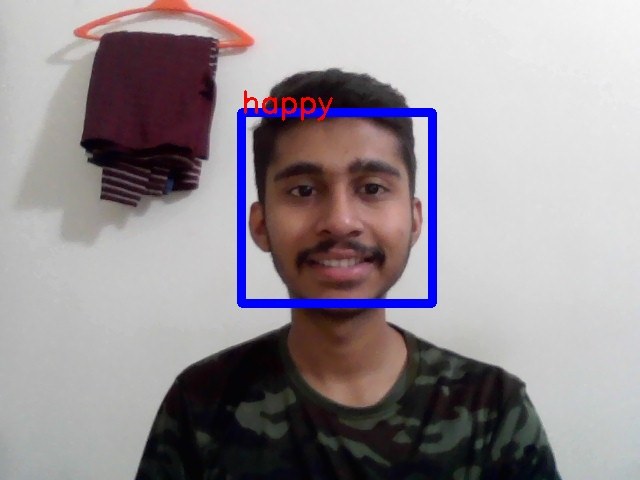